In [1]:
import os
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import shutil
from scipy import optimize as op

In [2]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = os.path.join(os.path.dirname(main_dir),'dcm_output','mechanical_txt')   
output_dir = os.path.join(main_dir,'analyze_figure')

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "SS_TXT", choose_type = "File")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

file_src_path = selector.run()

Import File : C:/Users/marsh/OneDrive/桌面/dcm_output/mechanical_txt/ss_A_CASUARIUS_FEMUR_ID[013]_s[56]_x[-70]_y[0]_si_LSM.txt


0.062225792941625
170.8158122951884


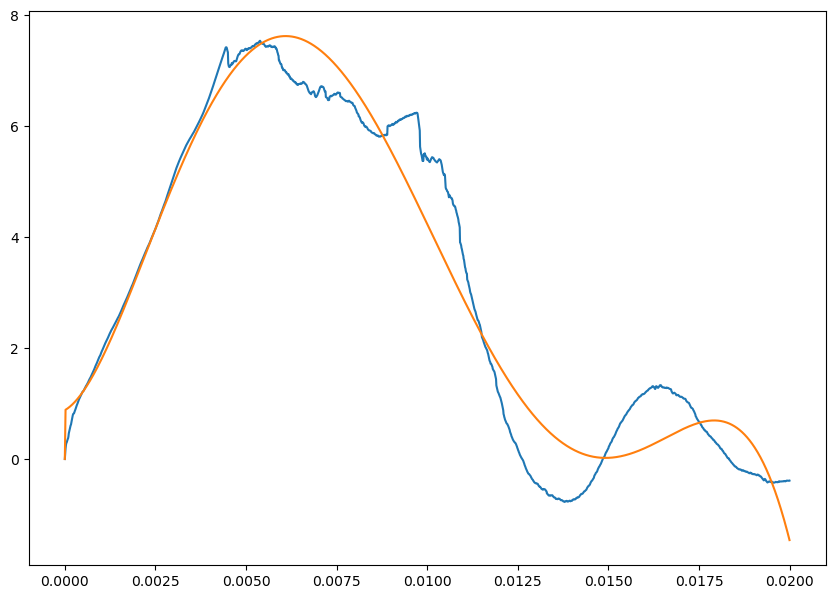

In [15]:
file_name = Path(file_src_path).stem

df = pd.read_csv(file_src_path, sep='\s+')
df = df[pd.to_numeric(df['exx'], errors='coerce').notnull()]
exx = np.array(df['exx'], dtype='float32')
sxx = np.array(df['sxx'], dtype='float32')
exx[0], sxx[0] = 0, 0

total_E = 0
for i in range(1, sxx.size):
    dx = exx[i]-exx[i-1]
    dy = sxx[i]
    energy = dx*dy
    total_E = total_E+energy
    
print(total_E)

fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*1.5)
ax.plot(exx,sxx)

def f_5(x, A, B, C, D, E, F):
    return A * x**5 + B * x**4 + C * x**3 + D * x**2 + E * x + F

popt, _ = op.curve_fit(f_5, exx, sxx)
y1 = [f_5(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]) for i in exx]
exx[0], y1[0] = 0, 0
ax.plot(exx, y1)

def f_1(x, A, B):
    return A * x + B

A, B = op.curve_fit(f_1, exx[0:5], y1[0:5])[0]

print(A/100)

0.062225792941625
170.8158122951884


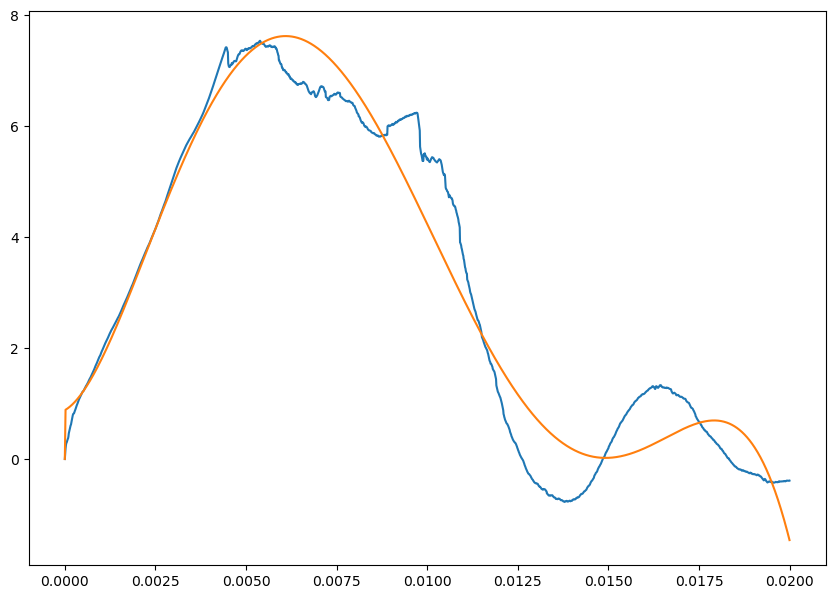

In [15]:
file_name = Path(file_src_path).stem

df = pd.read_csv(file_src_path, sep='\s+')
df = df[pd.to_numeric(df['exx'], errors='coerce').notnull()]
exx = np.array(df['exx'], dtype='float32')
sxx = np.array(df['sxx'], dtype='float32')
exx[0], sxx[0] = 0, 0

total_E = 0
for i in range(1, sxx.size):
    dx = exx[i]-exx[i-1]
    dy = sxx[i]
    energy = dx*dy
    total_E = total_E+energy
    
print(total_E)

fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*1.5)
ax.plot(exx,sxx)

def f_5(x, A, B, C, D, E, F):
    return A * x**5 + B * x**4 + C * x**3 + D * x**2 + E * x + F

popt, _ = op.curve_fit(f_5, exx, sxx)
y1 = [f_5(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]) for i in exx]
exx[0], y1[0] = 0, 0
ax.plot(exx, y1)

def f_1(x, A, B):
    return A * x + B

A, B = op.curve_fit(f_1, exx[0:5], y1[0:5])[0]

print(A/100)

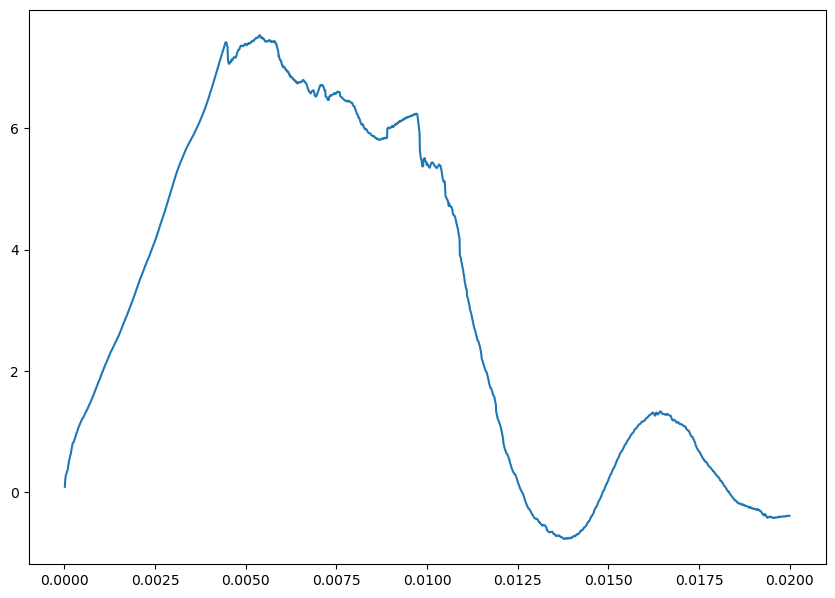

In [5]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*1.5)
ax.plot(exx,sxx)